In [1]:
%run auxStandardStructure.ipynb

C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import tensorflow as tf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


## Preprocessing

In [3]:
all_releases_df = pd.read_csv('all_releases.csv')

In [4]:
X, y = generateStandardTimeSeriesStructure(all_releases_df, 2)

Generating a new dataframe without containing the last release...
... DONE!
checking class larger than window size...
DONE
Setting the features...
DONE
X: (80568, 16) y: (80568,)


In [5]:
print("Declaring a dictionary to save results...")
results_dict = dict()
print("... DONE!")

print("Splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("General information:")
print("X Train set:", X_train.shape[0], "X Test set:", X_test.shape[0])
print("y Train set:", y_train.shape[0], "y Test set:", y_test.shape[0])
print("... DONE!")

print("Scaling features...")
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
print("... DONE!")

print("Setting stratified k-fold...")
k=10
kf = StratifiedKFold(n_splits=k, shuffle=False, random_state=42)
print("k =", k)
print("... DONE!\n")

Declaring a dictionary to save results...
... DONE!
Splitting dataset into train and test sets...
General information:
X Train set: 56397 X Test set: 24171
y Train set: 56397 y Test set: 24171
... DONE!
Scaling features...
... DONE!
Setting stratified k-fold...
k = 10
... DONE!



In [6]:
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

## Statistical Analysis

In [7]:
all_releases_df.describe()

,CountClassCoupled,CountClassDerived,CountDeclMethod,CountDeclMethodAll,CountLineCode,MaxInheritanceTree,PercentLackOfCohesion,SumCyclomatic,class_frequency,number_of_changes,release,will_change
count,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000,100640.000000
mean,5.338504,0.448698,4.287997,8.674672,57.746343,1.625735,17.538782,5.891107,6.378975,7.580535,8.864159,0.167548
std,7.230259,11.276201,5.618115,8.966859,117.082274,0.759659,28.567063,9.420142,4.120797,4.492134,4.233281,0.373466
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,8.000000,1.000000,0.000000,1.000000,3.000000,4.000000,5.000000,0.000000
50%,3.000000,0.000000,2.000000,6.000000,22.000000,1.000000,0.000000,3.000000,6.000000,8.000000,9.000000,0.000000
75%,7.000000,0.000000,5.000000,11.000000,57.000000,2.000000,33.000000,7.000000,9.000000,12.000000,13.000000,0.000000
max,106.000000,901.000000,100.000000,100.000000,2749.000000,6.000000,100.000000,179.000000,15.000000,15.000000,15.000000,1.000000


0
False    44915
True     11482
Name: 0, dtype: int64

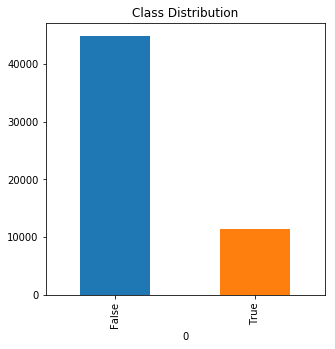

In [8]:
ax = y_train.groupby([0])[0].count().plot.bar(title="Class Distribution", figsize=(5,5))
y_train.groupby([0])[0].count()

In [9]:
X_train.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,-0.011,0.47,0.27,0.63,-0.053,0.37,0.52,1.0,-0.01,0.47,0.27,0.63,-0.052,0.37,0.52
1,-0.011,1.0,0.082,0.044,0.025,-0.011,0.014,0.025,-0.011,1.0,0.082,0.044,0.025,-0.011,0.014,0.025
2,0.47,0.082,1.0,0.5,0.8,-0.17,0.56,0.88,0.47,0.081,1.0,0.49,0.8,-0.17,0.56,0.88
3,0.27,0.044,0.5,1.0,0.3,0.51,0.3,0.43,0.27,0.044,0.5,1.0,0.3,0.51,0.3,0.43
4,0.63,0.025,0.8,0.3,1.0,-0.25,0.54,0.86,0.63,0.024,0.8,0.3,1.0,-0.25,0.54,0.86
5,-0.053,-0.011,-0.17,0.51,-0.25,1.0,-0.11,-0.12,-0.052,-0.011,-0.17,0.51,-0.25,1.0,-0.11,-0.12
6,0.37,0.014,0.56,0.3,0.54,-0.11,1.0,0.58,0.37,0.014,0.56,0.3,0.54,-0.11,0.99,0.58
7,0.52,0.025,0.88,0.43,0.86,-0.12,0.58,1.0,0.52,0.024,0.88,0.43,0.86,-0.12,0.58,1.0
8,1.0,-0.011,0.47,0.27,0.63,-0.052,0.37,0.52,1.0,-0.01,0.47,0.27,0.63,-0.051,0.37,0.52
9,-0.01,1.0,0.081,0.044,0.024,-0.011,0.014,0.024,-0.01,1.0,0.081,0.044,0.025,-0.011,0.014,0.024


## Imbalanced baseline

In [10]:
%%time
LogisticRegr_(X_train, y_train, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5899196482752047
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5847476066144474
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5773663438835126
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5840782374240229
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5850753643333405
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.592251479342735
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5876698228047268
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5892676758860346
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5804001537725082
10 of KFold 10
ROC AUC score: 0.5975037570301267

CROSS VALIDANTION SUMMARY:
Mean: 0.586828008936666
Std deviation: 0.005526354998563648

TEST SET:
F1-Score(micro): 0.685159902362335
F1-Score(macro): 0.5767484132987657
F1-Score(weighted): 0.7040541470025321
F1-Score(None): [0.79095704 0.36253979]
Accuracy: 0.685159902362335
Sensitivity: 0.4413624311645931
Specificity: 0.7471974257836828
Confusion Matrix: [0.7471974257836828, 0.44]
ROC AUC score: 0.594279928474138
Wall time: 5.66 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [11]:
%%time
DecisionTree_(X_train, y_train, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6769268565255163
2 of KFold 10
ROC AUC score: 0.6773509738229146
3 of KFold 10
ROC AUC score: 0.6713770667791908
4 of KFold 10
ROC AUC score: 0.6813894465111805
5 of KFold 10
ROC AUC score: 0.6791729625412269
6 of KFold 10
ROC AUC score: 0.6744641043604824
7 of KFold 10
ROC AUC score: 0.6745326696753942
8 of KFold 10
ROC AUC score: 0.6675640285604115
9 of KFold 10
ROC AUC score: 0.6646755570762121
10 of KFold 10
ROC AUC score: 0.6671872587606494

CROSS VALIDANTION SUMMARY:
Mean: 0.6734640924613179
Std deviation: 0.005295718297861406

TEST SET:
F1-Score(micro): 0.6534276612469488
F1-Score(macro): 0.5749867585108479
F1-Score(weighted): 0.6835001991699475
F1-Score(None): [0.75757488 0.39239864]
Accuracy: 0.6534276612469488
Sensitivity: 0.5517030389557414
Specificity: 0.679312850321777
Confusion Matrix: [0.679312850321777, 0.55]
ROC AUC score: 0.6155079446387592
Wall time: 3.73 s


In [12]:
%%time
RandomForest_(X_train, y_train, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6187150621509121
2 of KFold 10
ROC AUC score: 0.6249680313594926
3 of KFold 10
ROC AUC score: 0.6206663181311879
4 of KFold 10
ROC AUC score: 0.6326822597509781
5 of KFold 10
ROC AUC score: 0.6237922780258206
6 of KFold 10
ROC AUC score: 0.6176398480274525
7 of KFold 10
ROC AUC score: 0.6158745093749249
8 of KFold 10
ROC AUC score: 0.6225385342888642
9 of KFold 10
ROC AUC score: 0.6053102139237826
10 of KFold 10
ROC AUC score: 0.6146462495257646

CROSS VALIDANTION SUMMARY:
Mean: 0.6196833304559181
Std deviation: 0.006888260124327689

TEST SET:
F1-Score(micro): 0.740432749989657
F1-Score(macro): 0.6052998308291619
F1-Score(weighted): 0.742553905900965
F1-Score(None): [0.83624785 0.37435181]
Accuracy: 0.740432749989657
Sensitivity: 0.3828268407097695
Specificity: 0.8314303508407722
Confusion Matrix: [0.8314303508407722, 0.38]
ROC AUC score: 0.607128595775271
Wall time: 1min 18s


In [13]:
%%time
NN_(X_train, y_train, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5907466673176645
2 of KFold 10
ROC AUC score: 0.5865768909741484
3 of KFold 10
ROC AUC score: 0.5851335397656229
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.59547519244433
5 of KFold 10
ROC AUC score: 0.5798054458409996
6 of KFold 10
ROC AUC score: 0.6048965914795134
7 of KFold 10
ROC AUC score: 0.5860044711955851
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5886079165687161
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5955765576836988
10 of KFold 10
ROC AUC score: 0.5940472699173026

CROSS VALIDANTION SUMMARY:
Mean: 0.5906870543187581
Std deviation: 0.006726312711509214

TEST SET:
F1-Score(micro): 0.8315336560340905
F1-Score(macro): 0.6182451907517514
F1-Score(weighted): 0.7878300030493549
F1-Score(None): [0.90359392 0.33289646]
Accuracy: 0.8315336560340905
Sensitivity: 0.2072200693452988
Specificity: 0.9903985883329873
Confusion Matrix: [0.9903985883329873, 0.21]
ROC AUC score: 0.5988093288391431
Wall time: 12min


## Undersampling

In [14]:
print("Resampling dataset using Random UnderSampling (RUS)...")
X_RUS, y_RUS = RandomUnderSampler(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y RUS:", len(X_RUS), len(y_RUS))

Resampling dataset using Random UnderSampling (RUS)...
... DONE!
X and Y RUS: 22964 22964


In [15]:
%%time
LogisticRegr_(X_RUS, y_RUS, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5732800334315752
2 of KFold 10
ROC AUC score: 0.5873478418788466
3 of KFold 10
ROC AUC score: 0.5732023838748455
4 of KFold 10
ROC AUC score: 0.5845980970171035
5 of KFold 10
ROC AUC score: 0.5906362461615418
6 of KFold 10
ROC AUC score: 0.5852126013462393
7 of KFold 10
ROC AUC score: 0.5684614667567757
8 of KFold 10
ROC AUC score: 0.5842395773311292
9 of KFold 10
ROC AUC score: 0.5996422650728557
10 of KFold 10
ROC AUC score: 0.6008980001737221

CROSS VALIDANTION SUMMARY:
Mean: 0.5847518513044634
Std deviation: 0.010269642656549382

TEST SET:
F1-Score(micro): 0.6846634396590956
F1-Score(macro): 0.576367048346641
F1-Score(weighted): 0.7036624956261935
F1-Score(None): [0.79055836 0.36217573]
Accuracy: 0.6846634396590956
Sensitivity: 0.4413624311645931
Specificity: 0.7465746315133901
Confusion Matrix: [0.7465746315133901, 0.44]
ROC AUC score: 0.5939685313389916
Wall time: 3.3 s


In [16]:
%%time
DecisionTree_(X_RUS, y_RUS, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6324033343597414
2 of KFold 10
ROC AUC score: 0.6082826000753085
3 of KFold 10
ROC AUC score: 0.6208441526260772
4 of KFold 10
ROC AUC score: 0.615876675811881
5 of KFold 10
ROC AUC score: 0.6198108444839676
6 of KFold 10
ROC AUC score: 0.6296511883319421
7 of KFold 10
ROC AUC score: 0.6097014751462329
8 of KFold 10
ROC AUC score: 0.6377188355409262
9 of KFold 10
ROC AUC score: 0.6369356949655354
10 of KFold 10
ROC AUC score: 0.6312904335078883

CROSS VALIDANTION SUMMARY:
Mean: 0.6242515234849499
Std deviation: 0.010274189295024402

TEST SET:
F1-Score(micro): 0.6708865996442017
F1-Score(macro): 0.572712185213374
F1-Score(weighted): 0.6944345625048327
F1-Score(None): [0.77752608 0.36789829]
Accuracy: 0.6708865996442017
Sensitivity: 0.47215990210075465
Specificity: 0.721455262611584
Confusion Matrix: [0.721455262611584, 0.47]
ROC AUC score: 0.5968075823561693
Wall time: 1.79 s


In [17]:
%%time
RandomForest_(X_RUS, y_RUS, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5859191483746096
2 of KFold 10
ROC AUC score: 0.5832308671471748
3 of KFold 10
ROC AUC score: 0.5857648649302782
4 of KFold 10
ROC AUC score: 0.5799038779600334
5 of KFold 10
ROC AUC score: 0.5807546767821331
6 of KFold 10
ROC AUC score: 0.5705872590509941
7 of KFold 10
ROC AUC score: 0.5870208105147864
8 of KFold 10
ROC AUC score: 0.5962711922219961
9 of KFold 10
ROC AUC score: 0.5851601081930023
10 of KFold 10
ROC AUC score: 0.591493807285141

CROSS VALIDANTION SUMMARY:
Mean: 0.5846106612460149
Std deviation: 0.006542803559323288

TEST SET:
F1-Score(micro): 0.7427495759381076
F1-Score(macro): 0.5839493604566495
F1-Score(weighted): 0.7367093614873296
F1-Score(None): [0.84098813 0.32691059]
Accuracy: 0.7427495759381076
Sensitivity: 0.30797470936161536
Specificity: 0.8533838488685904
Confusion Matrix: [0.8533838488685904, 0.31]
ROC AUC score: 0.580679279115103
Wall time: 32 s


In [18]:
%%time
NN_(X_RUS, y_RUS, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5582171292834206
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5626443273719672
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5617422893450568
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5583347926760454
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.579619928950891
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5664723942850727
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5531914893617021
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5637944203713338
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5578384666841172
10 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5612691466083151

CROSS VALIDANTION SUMMARY:
Mean: 0.5623124384937922
Std deviation: 0.006755558949745254

TEST SET:
F1-Score(micro): 0.8218940052128584
F1-Score(macro): 0.562888450458962
F1-Score(weighted): 0.762856997918906
F1-Score(None): [0.89936181 0.22641509]
Accuracy: 0.8218940052128584
Sensitivity: 0.12849275953497857
Specificity: 0.9983392152792194
Confusion Matrix: [0.9983392152792194, 0.13]
ROC AUC score: 0.563415987407099
Wall time: 4min 12s


In [19]:
print("Resampling dataset using Edited Nearest Neighbour (ENN)...")
X_ENN, y_ENN = EditedNearestNeighbours(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y ENN:", len(X_ENN), len(y_ENN))

Resampling dataset using Edited Nearest Neighbour (ENN)...
... DONE!
X and Y ENN: 43283 43283


In [20]:
%%time
LogisticRegr_(X_ENN, y_ENN, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.5803856796894991
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.586048149524518
3 of KFold 10
ROC AUC score: 0.6036194493943821
4 of KFold 10
ROC AUC score: 0.568866864973114
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5795589297123599
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5793295136791657
7 of KFold 10
ROC AUC score: 0.5924162013027706
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5918008618921123
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5781027576138733
10 of KFold 10
ROC AUC score: 0.5943310390807302

CROSS VALIDANTION SUMMARY:
Mean: 0.5854459446862526
Std deviation: 0.009617772675391519

TEST SET:
F1-Score(micro): 0.6805262504654338
F1-Score(macro): 0.5743752351616156
F1-Score(weighted): 0.7006994282557543
F1-Score(None): [0.78693229 0.36181818]
Accuracy: 0.6805262504654338
Sensitivity: 0.44646135019375893
Specificity: 0.7400871911978409
Confusion Matrix: [0.7400871911978409, 0.45]
ROC AUC score: 0.5932742706958001
Wall time: 5.38 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [21]:
%%time
DecisionTree_(X_ENN, y_ENN, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6573695969671646
2 of KFold 10
ROC AUC score: 0.6692926483294598
3 of KFold 10
ROC AUC score: 0.6625311444419305
4 of KFold 10
ROC AUC score: 0.6612516758979491
5 of KFold 10
ROC AUC score: 0.6603467196803348
6 of KFold 10
ROC AUC score: 0.659687473095424
7 of KFold 10
ROC AUC score: 0.6722286329069895
8 of KFold 10
ROC AUC score: 0.6524612858176367
9 of KFold 10
ROC AUC score: 0.6588996485839803
10 of KFold 10
ROC AUC score: 0.6512448444679753

CROSS VALIDANTION SUMMARY:
Mean: 0.6605313670188844
Std deviation: 0.006187691752752152

TEST SET:
F1-Score(micro): 0.6422158785321253
F1-Score(macro): 0.5666937695352923
F1-Score(weighted): 0.6742029456069905
F1-Score(None): [0.74759208 0.38579545]
Accuracy: 0.6422158785321253
Sensitivity: 0.5539465633285744
Specificity: 0.6646771849698982
Confusion Matrix: [0.6646771849698982, 0.55]
ROC AUC score: 0.6093118741492364
Wall time: 2.76 s


In [22]:
%%time
RandomForest_(X_ENN, y_ENN, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6033878285258752
2 of KFold 10
ROC AUC score: 0.6132466968407031
3 of KFold 10
ROC AUC score: 0.6076519935789901
4 of KFold 10
ROC AUC score: 0.608376688438682
5 of KFold 10
ROC AUC score: 0.6086359634670121
6 of KFold 10
ROC AUC score: 0.626911208953039
7 of KFold 10
ROC AUC score: 0.6055318362018404
8 of KFold 10
ROC AUC score: 0.5985284873223752
9 of KFold 10
ROC AUC score: 0.6077904233662187
10 of KFold 10
ROC AUC score: 0.6020481596956684

CROSS VALIDANTION SUMMARY:
Mean: 0.6082109286390405
Std deviation: 0.007334344081741207

TEST SET:
F1-Score(micro): 0.7440321045881427
F1-Score(macro): 0.6018563630302918
F1-Score(weighted): 0.7432544887211343
F1-Score(None): [0.83977729 0.36393544]
Accuracy: 0.7440321045881428
Sensitivity: 0.3610034672649398
Specificity: 0.8414988582105044
Confusion Matrix: [0.8414988582105044, 0.36]
ROC AUC score: 0.6012511627377222
Wall time: 56.1 s


In [23]:
%%time
NN_(X_ENN, y_ENN, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5757048250735461
2 of KFold 10
ROC AUC score: 0.5826786531123328
3 of KFold 10
ROC AUC score: 0.5767133961599791
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5884893661099233
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5803386977016965
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5823180362917396
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5830662814426275
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5767498560165332
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.58042274320026
10 of KFold 10
ROC AUC score: 0.5838134269336105

CROSS VALIDANTION SUMMARY:
Mean: 0.5810295282042248
Std deviation: 0.0037157770605168697

TEST SET:
F1-Score(micro): 0.8295891771130693
F1-Score(macro): 0.602465168098967
F1-Score(weighted): 0.7810440618859172
F1-Score(None): [0.90294762 0.30198271]
Accuracy: 0.8295891771130693
Sensitivity: 0.18172547419946972
Specificity: 0.99444675108989
Confusion Matrix: [0.99444675108989, 0.18]
ROC AUC score: 0.5880861126446798
Wall time: 9min 19s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
print("Resampling dataset using Tomek's Link (TL)...")
X_TL, y_TL = TomekLinks(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y TL:", len(X_TL), len(y_TL))

Resampling dataset using Tomek's Link (TL)...
... DONE!
X and Y TL: 55655 55655


In [25]:
%%time
LogisticRegr_(X_TL, y_TL, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5890099341401153
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5870739366117484
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5738387596009633
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5859925788497217
5 of KFold 10
ROC AUC score: 0.5869923359018683
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5905628215732366
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5848753492904805
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5895749239357913
9 of KFold 10
ROC AUC score: 0.5831536241333405
10 of KFold 10
ROC AUC score: 0.5946606820457785

CROSS VALIDANTION SUMMARY:
Mean: 0.5865734946083044
Std deviation: 0.0052323815468846855

TEST SET:
F1-Score(micro): 0.6851185304703984
F1-Score(macro): 0.5761913265448637
F1-Score(weighted): 0.7038834502914205
F1-Score(None): [0.7910501  0.36133255]
Accuracy: 0.6851185304703984
Sensitivity: 0.43911890679176013
Specificity: 0.7477164210089268
Confusion Matrix: [0.7477164210089268, 0.44]
ROC AUC score: 0.5934176639003433
Wall time: 5.31 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [26]:
%%time
DecisionTree_(X_TL, y_TL, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.670532104516521
2 of KFold 10
ROC AUC score: 0.6803940645702368
3 of KFold 10
ROC AUC score: 0.6608871616850837
4 of KFold 10
ROC AUC score: 0.6718614718614718
5 of KFold 10
ROC AUC score: 0.6687651987928862
6 of KFold 10
ROC AUC score: 0.6696456314552701
7 of KFold 10
ROC AUC score: 0.6833260409104922
8 of KFold 10
ROC AUC score: 0.6671997603494261
9 of KFold 10
ROC AUC score: 0.6596919829042085
10 of KFold 10
ROC AUC score: 0.6712047848252412

CROSS VALIDANTION SUMMARY:
Mean: 0.6703508201870838
Std deviation: 0.006988416183746933

TEST SET:
F1-Score(micro): 0.6582268007115966
F1-Score(macro): 0.5792883351228736
F1-Score(weighted): 0.6875931162290825
F1-Score(None): [0.76152536 0.39705131]
Accuracy: 0.6582268007115966
Sensitivity: 0.5547623903732408
Specificity: 0.6845547020967407
Confusion Matrix: [0.6845547020967407, 0.55]
ROC AUC score: 0.6196585462349907
Wall time: 4.11 s


In [27]:
%%time
RandomForest_(X_TL, y_TL, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6204873979829805
2 of KFold 10
ROC AUC score: 0.6243308929342866
3 of KFold 10
ROC AUC score: 0.6190844199416331
4 of KFold 10
ROC AUC score: 0.6311069882498455
5 of KFold 10
ROC AUC score: 0.6255026588731653
6 of KFold 10
ROC AUC score: 0.6214028802216999
7 of KFold 10
ROC AUC score: 0.6177424647726256
8 of KFold 10
ROC AUC score: 0.6264715870500339
9 of KFold 10
ROC AUC score: 0.6093225265745309
10 of KFold 10
ROC AUC score: 0.6192847289273027

CROSS VALIDANTION SUMMARY:
Mean: 0.6214736545528103
Std deviation: 0.005614502392164987

TEST SET:
F1-Score(micro): 0.7427495759381076
F1-Score(macro): 0.6072001918115053
F1-Score(weighted): 0.7443342789288124
F1-Score(None): [0.83794631 0.37645407]
Accuracy: 0.7427495759381076
Sensitivity: 0.3828268407097695
Specificity: 0.8343367241021382
Confusion Matrix: [0.8343367241021382, 0.38]
ROC AUC score: 0.6085817824059538
Wall time: 1min 11s


In [28]:
%%time
NN_(X_TL, y_TL, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5929100469708904
2 of KFold 10
ROC AUC score: 0.5805604498410327
3 of KFold 10
ROC AUC score: 0.5873243376351387
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5971346114203256
5 of KFold 10
ROC AUC score: 0.587883815299874
6 of KFold 10
ROC AUC score: 0.5940373060036092
7 of KFold 10
ROC AUC score: 0.589947892324062
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5956538484900357
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6004208036948001
10 of KFold 10
ROC AUC score: 0.5923602162695065

CROSS VALIDANTION SUMMARY:
Mean: 0.5918233327949275
Std deviation: 0.005378665920746911

TEST SET:
F1-Score(micro): 0.8302924992759919
F1-Score(macro): 0.6205247619033039
F1-Score(weighted): 0.7882012154873372
F1-Score(None): [0.90266243 0.3383871 ]
Accuracy: 0.8302924992759919
Sensitivity: 0.21395064246379766
Specificity: 0.9871289184139506
Confusion Matrix: [0.9871289184139506, 0.21]
ROC AUC score: 0.6005397804388741
Wall time: 11min 44s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Oversampling

In [29]:
print("Resampling dataset using Random OverSampling (ROS)...")
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)
print("X and Y ROS:", len(X_ROS), len(y_ROS))

C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Resampling dataset using Random OverSampling (ROS)...
X and Y ROS: 89830 89830


In [30]:
%%time
LogisticRegr_NoIloc(X_ROS, y_ROS, X_test, y_test)

Wall time: 0 ns

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5818121104185219
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5934995547640249
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5831478183437222
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5795859305431879
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5880454140694568
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5826096637719884
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5927410376308172
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5888443553774214
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5833890002226676
10 of KFold 10
ROC AUC score: 0.5915163660654642

CROSS VALIDANTION SUMMARY:
Mean: 0.5865191251207273
Std deviation: 0.004762559372919916

TEST SET:
F1-Score(micro): 0.685821852633321
F1-Score(macro): 0.5775907340568881
F1-Score(weighted): 0.7046638863536153
F1-Score(None): [0.79140801 0.36377346]
Accuracy: 0.685821852633321
Sensitivity: 0.44279012849275956
Specificity: 0.7476645214864023
Confusion Matrix: [0.7476645214864023, 0.44]
ROC AUC score: 0.595227324989581
Wall time: 9.21 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [31]:
%%time
DecisionTree_NoIloc(X_ROS, y_ROS, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8105520926090828
2 of KFold 10
ROC AUC score: 0.8239091718610864
3 of KFold 10
ROC AUC score: 0.8215716829919857
4 of KFold 10
ROC AUC score: 0.8304764024933216
5 of KFold 10
ROC AUC score: 0.8270258236865539
6 of KFold 10
ROC AUC score: 0.8228679581384992
7 of KFold 10
ROC AUC score: 0.8371186818080606
8 of KFold 10
ROC AUC score: 0.8304386550879537
9 of KFold 10
ROC AUC score: 0.829547984858606
10 of KFold 10
ROC AUC score: 0.831774660431975

CROSS VALIDANTION SUMMARY:
Mean: 0.8265283113967123
Std deviation: 0.006928131716486542

TEST SET:
F1-Score(micro): 0.6528070828678996
F1-Score(macro): 0.576917698865816
F1-Score(weighted): 0.6834089561863131
F1-Score(None): [0.75610323 0.39773217]
Accuracy: 0.6528070828678996
Sensitivity: 0.5651641851927391
Specificity: 0.6751089889973012
Confusion Matrix: [0.6751089889973012, 0.57]
ROC AUC score: 0.6201365870950202
Wall time: 7.34 s


In [32]:
%%time
RandomForest_NoIloc(X_ROS, y_ROS, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8102181656277827
2 of KFold 10
ROC AUC score: 0.8201246660730187
3 of KFold 10
ROC AUC score: 0.8210151380231523
4 of KFold 10
ROC AUC score: 0.8271371326803206
5 of KFold 10
ROC AUC score: 0.8258014247551203
6 of KFold 10
ROC AUC score: 0.8216432865731463
7 of KFold 10
ROC AUC score: 0.8346693386773547
8 of KFold 10
ROC AUC score: 0.8272099755065687
9 of KFold 10
ROC AUC score: 0.8273213092852372
10 of KFold 10
ROC AUC score: 0.8293253173012692

CROSS VALIDANTION SUMMARY:
Mean: 0.824446575450297
Std deviation: 0.0062772759814466485

TEST SET:
F1-Score(micro): 0.7170576310454677
F1-Score(macro): 0.6138058684833535
F1-Score(weighted): 0.7324817821659244
F1-Score(None): [0.81349369 0.41411805]
Accuracy: 0.7170576310454677
Sensitivity: 0.4929634917397512
Specificity: 0.7740813784513183
Confusion Matrix: [0.7740813784513183, 0.49]
ROC AUC score: 0.6335224350955347
Wall time: 2min 2s


In [33]:
%%time
NN_NoIloc(X_ROS, y_ROS, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6470391807658059
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6585040071237755
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6592831700801425
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6552760463045414
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6516028495102405
6 of KFold 10
ROC AUC score: 0.641616566466266
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.659318637274549
8 of KFold 10
ROC AUC score: 0.6562012914718325
9 of KFold 10
ROC AUC score: 0.6518592741037631
10 of KFold 10
ROC AUC score: 0.656089957693164

CROSS VALIDANTION SUMMARY:
Mean: 0.653679098079408
Std deviation: 0.005462869741280487

TEST SET:
F1-Score(micro): 0.7112655661743411
F1-Score(macro): 0.6161090155904003
F1-Score(weighted): 0.7296975023062313
F1-Score(None): [0.80723657 0.42498146]
Accuracy: 0.7112655661743411
Sensitivity: 0.5260044870487457
Specificity: 0.7584077226489516
Confusion Matrix: [0.7584077226489516, 0.53]
ROC AUC score: 0.6422061048488487
Wall time: 18min 39s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
print("Resampling dataset using SMOTE (SMO)...")
sm = SMOTE(random_state=42)
X_SMO, y_SMO = sm.fit_resample(X_train, y_train)
print("X and Y SMO:", len(X_SMO), len(y_SMO))

C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Resampling dataset using SMOTE (SMO)...
X and Y SMO: 89830 89830


In [35]:
%%time
LogisticRegr_NoIloc(X_SMO, y_SMO, X_test, y_test)

Wall time: 0 ns

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5838156723063224
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5941674087266251
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5914959928762245
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5859305431878895
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5821460373998218
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5838343353373413
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5881763527054109
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5878423513694054
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5840570028946782
10 of KFold 10
ROC AUC score: 0.5850590069026943

CROSS VALIDANTION SUMMARY:
Mean: 0.5866524703706413
Std deviation: 0.003602305448758541

TEST SET:
F1-Score(micro): 0.684622067767159
F1-Score(macro): 0.5771893833044295
F1-Score(weighted): 0.7038530826073768
F1-Score(None): [0.7903177  0.36406107]
Accuracy: 0.684622067767159
Sensitivity: 0.4450336528655925
Specificity: 0.7455885405854266
Confusion Matrix: [0.7455885405854266, 0.45]
ROC AUC score: 0.5953110967255095
Wall time: 9.15 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [36]:
%%time
DecisionTree_NoIloc(X_SMO, y_SMO, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.690227070347284
2 of KFold 10
ROC AUC score: 0.7016918967052538
3 of KFold 10
ROC AUC score: 0.772373107747106
4 of KFold 10
ROC AUC score: 0.8673196794300979
5 of KFold 10
ROC AUC score: 0.8656500445235975
6 of KFold 10
ROC AUC score: 0.8617234468937877
7 of KFold 10
ROC AUC score: 0.8627254509018036
8 of KFold 10
ROC AUC score: 0.8603874415497663
9 of KFold 10
ROC AUC score: 0.8564907592963706
10 of KFold 10
ROC AUC score: 0.867512803384547

CROSS VALIDANTION SUMMARY:
Mean: 0.8206101700779614
Std deviation: 0.0679794046771023

TEST SET:
F1-Score(micro): 0.5374208762566712
F1-Score(macro): 0.4949139232385906
F1-Score(weighted): 0.581994981439493
F1-Score(None): [0.64143925 0.3483886 ]
Accuracy: 0.5374208762566712
Sensitivity: 0.6096267591270651
Specificity: 0.5190471247664521
Confusion Matrix: [0.5190471247664521, 0.61]
ROC AUC score: 0.5643369419467585
Wall time: 9.67 s


In [37]:
%%time
RandomForest_NoIloc(X_SMO, y_SMO, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6980186999109529
2 of KFold 10
ROC AUC score: 0.710373998219056
3 of KFold 10
ROC AUC score: 0.7791629563668744
4 of KFold 10
ROC AUC score: 0.8778940338379341
5 of KFold 10
ROC AUC score: 0.8752226179875335
6 of KFold 10
ROC AUC score: 0.8715208194166111
7 of KFold 10
ROC AUC score: 0.8761968381206858
8 of KFold 10
ROC AUC score: 0.8748608327766644
9 of KFold 10
ROC AUC score: 0.8747494989979959
10 of KFold 10
ROC AUC score: 0.8793141839234022

CROSS VALIDANTION SUMMARY:
Mean: 0.831731447955771
Std deviation: 0.06994842416146362

TEST SET:
F1-Score(micro): 0.4504985312978362
F1-Score(macro): 0.4424111247656415
F1-Score(weighted): 0.48232029509713475
F1-Score(None): [0.50956355 0.3752587 ]
Accuracy: 0.45049853129783624
Sensitivity: 0.8135835202936977
Specificity: 0.35810670541831013
Confusion Matrix: [0.35810670541831013, 0.81]
ROC AUC score: 0.5858451128560039
Wall time: 2min 33s


In [38]:
%%time
NN_NoIloc(X_SMO, y_SMO, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6429207479964382
2 of KFold 10
ROC AUC score: 0.6277827248441674
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6634016028495102
4 of KFold 10
ROC AUC score: 0.6385796972395369
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6498219056099733
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6529726118904475
7 of KFold 10
ROC AUC score: 0.6384992206635492
8 of KFold 10
ROC AUC score: 0.6509686038744156
9 of KFold 10
ROC AUC score: 0.6582052994878647
10 of KFold 10
ROC AUC score: 0.6578712981518593

CROSS VALIDANTION SUMMARY:
Mean: 0.6481023712607762
Std deviation: 0.010435985732993994

TEST SET:
F1-Score(micro): 0.6835463985768069
F1-Score(macro): 0.6018679498100921
F1-Score(weighted): 0.7090392063440579
F1-Score(None): [0.78219767 0.42153823]
Accuracy: 0.6835463985768069
Sensitivity: 0.5684274933714053
Specificity: 0.7128399418725347
Confusion Matrix: [0.7128399418725347, 0.57]
ROC AUC score: 0.6406337176219701
Wall time: 19min 18s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [39]:
print("Resampling dataset using ADASYN (ADA)...")
ada = ADASYN(random_state=42)
X_ADA, y_ADA = ada.fit_resample(X_train, y_train)
print("X and Y ADA:", len(X_ADA), len(y_ADA))

Resampling dataset using ADASYN (ADA)...


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X and Y ADA: 89168 89168


In [40]:
%%time
LogisticRegr_NoIloc(X_ADA, y_ADA, X_test, y_test)

Wall time: 0 ns

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5813157215981497
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5924365614182203
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5839023856842048
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5632500465359636
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.567532109814812
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5698507372560564
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5746579411176402
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.5775277107888094
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ROC AUC score: 0.572055749917915
10 of KFold 10
ROC AUC score: 0.5803276609716609

CROSS VALIDANTION SUMMARY:
Mean: 0.5762856625103432
Std deviation: 0.00818871056075934

TEST SET:
F1-Score(micro): 0.6722105001861736
F1-Score(macro): 0.5715018722003863
F1-Score(weighted): 0.6949597524714082
F1-Score(None): [0.77923598 0.36376777]
Accuracy: 0.6722105001861736
Sensitivity: 0.461962064042423
Specificity: 0.7257110234585842
Confusion Matrix: [0.7257110234585842, 0.46]
ROC AUC score: 0.5938365437505037
Wall time: 9.29 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [41]:
%%time
DecisionTree_NoIloc(X_ADA, y_ADA, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7041969274895088
2 of KFold 10
ROC AUC score: 0.7332981684766491
3 of KFold 10
ROC AUC score: 0.7563735841677064
4 of KFold 10
ROC AUC score: 0.8354711200326004
5 of KFold 10
ROC AUC score: 0.8471196502507911
6 of KFold 10
ROC AUC score: 0.8425467130117108
7 of KFold 10
ROC AUC score: 0.835919900063781
8 of KFold 10
ROC AUC score: 0.843149877910246
9 of KFold 10
ROC AUC score: 0.8234788975314093
10 of KFold 10
ROC AUC score: 0.846014665866573

CROSS VALIDANTION SUMMARY:
Mean: 0.8067569504800975
Std deviation: 0.05116982241915252

TEST SET:
F1-Score(micro): 0.48744363079723635
F1-Score(macro): 0.4653080214904971
F1-Score(weighted): 0.5299639848274857
F1-Score(None): [0.57410018 0.35651587]
Accuracy: 0.48744363079723635
Sensitivity: 0.6999796043238833
Specificity: 0.4333610130786797
Confusion Matrix: [0.4333610130786797, 0.7]
ROC AUC score: 0.5666703087012814
Wall time: 8.9 s


In [42]:
%%time
RandomForest_NoIloc(X_ADA, y_ADA, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6965732422232586
2 of KFold 10
ROC AUC score: 0.7109303419967575
3 of KFold 10
ROC AUC score: 0.7662185704243403
4 of KFold 10
ROC AUC score: 0.8511537397306448
5 of KFold 10
ROC AUC score: 0.8512936997851799
6 of KFold 10
ROC AUC score: 0.8489741064049002
7 of KFold 10
ROC AUC score: 0.8558900097747283
8 of KFold 10
ROC AUC score: 0.856875408066604
9 of KFold 10
ROC AUC score: 0.8466909713966538
10 of KFold 10
ROC AUC score: 0.8611376425166718

CROSS VALIDANTION SUMMARY:
Mean: 0.814573773231974
Std deviation: 0.06129462433614487

TEST SET:
F1-Score(micro): 0.44210003723470276
F1-Score(macro): 0.4359495801682902
F1-Score(weighted): 0.47095406343255963
F1-Score(None): [0.49484922 0.37704994]
Accuracy: 0.44210003723470276
Sensitivity: 0.8323475423210279
Specificity: 0.34279634627361427
Confusion Matrix: [0.34279634627361427, 0.83]
ROC AUC score: 0.5875719442973211
Wall time: 2min 32s


In [43]:
%%time
NN_NoIloc(X_ADA, y_ADA, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6481271721097586
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.652221964921119
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.62678149717588
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6198698753842361
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6257845711899623
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6146232955553291
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6389356490759296
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6505718027391882
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6414296766791587
10 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6484437047352709

CROSS VALIDANTION SUMMARY:
Mean: 0.6366789209565832
Std deviation: 0.013104861512815019

TEST SET:
F1-Score(micro): 0.7086591369823342
F1-Score(macro): 0.6147657697269174
F1-Score(weighted): 0.7277950348424845
F1-Score(None): [0.80495236 0.42457918]
Accuracy: 0.7086591369823342
Sensitivity: 0.5298796655109117
Specificity: 0.7541519618019514
Confusion Matrix: [0.7541519618019514, 0.53]
ROC AUC score: 0.6420158136564316
Wall time: 21min 3s
